# Primjene QR rastava

---

Ortogonalne matrice imaju dva važna svojstva:

1. $Q^{-1}=Q^T$, i 
2. $\|Qx\|_2=\|x\|_2$ za svaki vektor $x$.

Prvo svojstvo slijedi iz definicije ortogonalne matrice, jer je $Q^TQ=I$, 
a drugo svojstvo slijedi iz

$$ \|Qx\|_2^2=(Qx)^T(Qx)=x^TQ^TQx=x^Tx=\|x\|_2^2.$$

## Sustav linearnih jednadžbi

QR rastav možemo koristiti za rješavanje sustava linearnih jednadžbi $Ax=b$:
množenjem jednakosti $QRx=b$ s lijeva s $Q^T$ dobijemo $Rx=Q^Tb$ pa preostaje riješiti trokutasti sustav. 

U odnosu na rješenje pomoću Gaussove eliminacije vrijedi:

* broj računskih operacija se udvostruči,
* rješenje je nešto točnije, i
* nema rasta elemenata (pivotiranje nije potrebno).

In [1]:
using LinearAlgebra
using Plots
import Random
Random.seed!(123);

In [2]:
n=10
A=rand(n,n)
b=rand(n)
Q,R=qr(A)
c=transpose(Q)*b
# Trokutasti sustav
x=R\c

10-element Array{Float64,1}:
 -1.351383206204747
 -2.803574341341639
 -6.212172382452091
 -0.4444920506128129
  2.120799184124584
  4.959355245144351
  1.709894004203791
  1.1499707113735083
  1.5333005874446426
  2.2712793728997602

In [3]:
# Rezidual
A*x-b

10-element Array{Float64,1}:
  1.3322676295501878e-15
  3.3306690738754696e-15
  2.6645352591003757e-15
 -2.6645352591003757e-15
  6.661338147750939e-16
  4.440892098500626e-16
 -4.440892098500626e-16
 -1.9984014443252818e-15
 -1.7763568394002505e-15
 -7.771561172376096e-16

## Problem najmanjih kvadrata

Programi za rješavanje problema najmanjih kvadrata uglavnom koriste QR rastav. Vrijedi

$$
\|Ax-b\|^2_2=\|QRx-b\|_2^2=\|Q(Rx-Q^Tb)\|_2=\|Rx-Q^Tb\|_2^2.
$$

Neka je

$$
R=\begin{bmatrix}R_0 \\ 0\end{bmatrix},\quad Q^Tb =\begin{bmatrix}c\\ d \end{bmatrix}.
$$

Tada je

$$
\|Rx-Q^T b\|_2^2 = \| R_0x-c\|_2^2+\|d\|_2^2
$$

pa je rješenje trokutastog sustava

$$
R_0x=c
$$
    
rješenje problema najmanjih kvadrata. Riješimo zadatak iz bilježnice o regresiji:

In [4]:
y=[1,3,2,4,3]
A=transpose([1 2 3 6 7;1 1 1 1 1])

5×2 Transpose{Int64,Array{Int64,2}}:
 1  1
 2  1
 3  1
 6  1
 7  1

In [5]:
#?qr  # Pogledajmo strukturu rješenja

In [6]:
Q=qr(A)
c=transpose(Matrix(Q.Q))*y
x=Q.R\c

2-element Array{Float64,1}:
 0.3208955223880595
 1.380597014925374

In [7]:
# Ugrađena funkcija
A\y

2-element Array{Float64,1}:
 0.3208955223880596
 1.3805970149253741

In [8]:
# Veći primjer
m=8
n=5
A=rand(m,n)
b=rand(m)
Q=qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
8×8 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.0566351  -0.574505    -0.0230314  …  -0.428439    0.498927   -0.316609
 -0.208694   -0.212997     0.342354       0.408418   -0.169411   -0.646288
 -0.065727   -0.527101    -0.139024      -0.106073    0.0272808   0.257775
 -0.22419    -0.00607116   0.32014       -0.616738   -0.468554    0.212567
 -0.793791   -0.0286567   -0.467893       0.0531959  -0.248767   -0.0696813
 -0.378103    0.262243    -0.0385568  …   0.137668    0.611397    0.287264
 -0.342123    0.234304     0.644938      -0.15383     0.245325   -0.0412849
 -0.0924361  -0.471395     0.352264       0.461055   -0.078795    0.530431
R factor:
5×5 Array{Float64,2}:
 -1.23002  -0.827746  -1.40152   -0.968313  -0.828217
  0.0      -1.13251   -0.809317  -0.595303  -0.266157
  0.0       0.0        0.999553   0.588012   0.814772
  0.0       0.0        0.0       -0.661953   0.267255
  0.0       0.0        0.0    

In [9]:
# Spremanje generatora
Q.factors

8×5 Array{Float64,2}:
 -1.23002    -0.827746  -1.40152    -0.968313   -0.828217
  0.197508   -1.13251   -0.809317   -0.595303   -0.266157
  0.0622041   0.446887   0.999553    0.588012    0.814772
  0.212173   -0.105339  -0.279719   -0.661953    0.267255
  0.751244   -0.366464   0.250239    0.0578108   1.11871
  0.357837   -0.425475  -0.0907333   0.204939   -0.621635
  0.323786   -0.382273  -0.6073      0.815619    0.673061
  0.0874816   0.383016  -0.171288   -0.238296    0.189205

In [10]:
c=transpose(Matrix(Q.Q))*b
x=Q.R\c

5-element Array{Float64,1}:
 -0.14514305642418154
  0.6290700505109127
  0.6734603175535071
  0.15574911692119198
 -0.39554931719172043

In [11]:
# Ugrađena funkcija
A\b

5-element Array{Float64,1}:
 -0.1451430564241818
  0.629070050510913
  0.6734603175535069
  0.15574911692119223
 -0.39554931719172054

## Numerička  "ortogonalizacija" polinoma

Numerička ortogonalizacija potencija vektora daje ortogonalne polinome.

In [12]:
# Standardna baza
n=101
x=range(-1,stop=1,length=n)
# Kvazi Vandermondeova matrica
V=[x.^0 x.^1 x.^2 x.^3 x.^4 x.^5]

101×6 Array{Float64,2}:
 1.0  -1.0   1.0     -1.0       1.0       -1.0
 1.0  -0.98  0.9604  -0.941192  0.922368  -0.903921
 1.0  -0.96  0.9216  -0.884736  0.849347  -0.815373
 1.0  -0.94  0.8836  -0.830584  0.780749  -0.733904
 1.0  -0.92  0.8464  -0.778688  0.716393  -0.659082
 1.0  -0.9   0.81    -0.729     0.6561    -0.59049
 1.0  -0.88  0.7744  -0.681472  0.599695  -0.527732
 1.0  -0.86  0.7396  -0.636056  0.547008  -0.470427
 1.0  -0.84  0.7056  -0.592704  0.497871  -0.418212
 1.0  -0.82  0.6724  -0.551368  0.452122  -0.37074
 1.0  -0.8   0.64    -0.512     0.4096    -0.32768
 1.0  -0.78  0.6084  -0.474552  0.370151  -0.288717
 1.0  -0.76  0.5776  -0.438976  0.333622  -0.253553
 ⋮                                         ⋮
 1.0   0.78  0.6084   0.474552  0.370151   0.288717
 1.0   0.8   0.64     0.512     0.4096     0.32768
 1.0   0.82  0.6724   0.551368  0.452122   0.37074
 1.0   0.84  0.7056   0.592704  0.497871   0.418212
 1.0   0.86  0.7396   0.636056  0.547008   0.470427
 1.0 

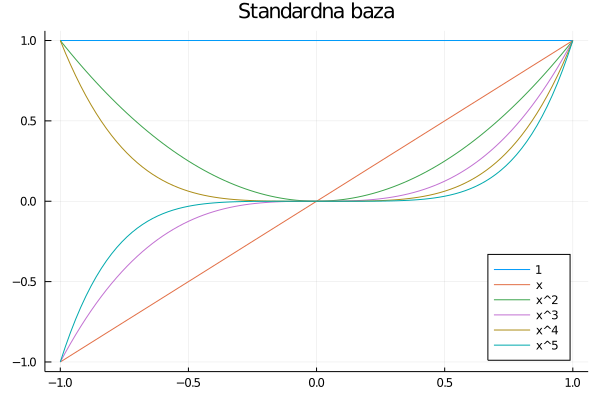

In [13]:
plot(x,V,title="Standardna baza",legend=:bottomright,
    label=["1" "x" "x^2" "x^3" "x^4" "x^5"])

In [14]:
# Ortogonalizacija s težinskom funkcijom ω(x)=1 daje normirane Legendreove polinome.
F=qr(V)
Q=Matrix(F.Q)*sign.(Diagonal(F.R))

101×6 Array{Float64,2}:
 0.0995037  -0.170647  0.215985   -0.248075     0.270363   -0.284449
 0.0995037  -0.167235  0.203026   -0.218306     0.21629    -0.199114
 0.0995037  -0.163822  0.190328   -0.190041     0.167133   -0.125847
 0.0995037  -0.160409  0.177893   -0.163248     0.122658   -0.0636625
 0.0995037  -0.156996  0.165719   -0.137897     0.0826352  -0.0116207
 0.0995037  -0.153583  0.153807   -0.113958     0.0468402   0.0311727
 0.0995037  -0.15017   0.142157   -0.0913997    0.0150535   0.0655686
 0.0995037  -0.146757  0.130769   -0.0701914   -0.0129396   0.0923749
 0.0995037  -0.143344  0.119642   -0.0503024   -0.0373491   0.112358
 0.0995037  -0.139931  0.108778   -0.0317021   -0.0583801   0.126243
 0.0995037  -0.136518  0.0981749  -0.0143598   -0.076233    0.134714
 0.0995037  -0.133105  0.0878338   0.00175509  -0.0911031   0.138419
 0.0995037  -0.129692  0.0777545   0.0166734   -0.103181    0.137966
 ⋮                                                          ⋮
 0.0995037  

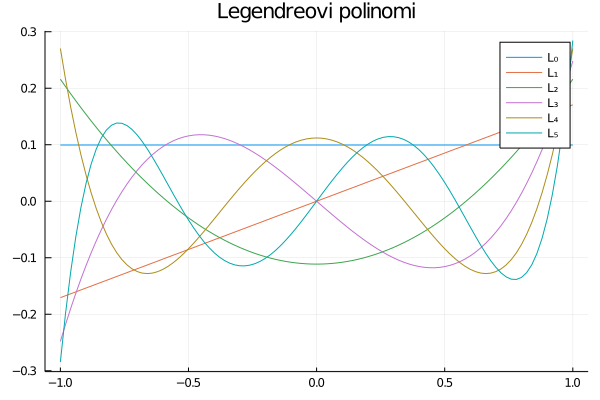

In [15]:
plot(x,Q,title="Legendreovi polinomi",label=["L₀" "L₁" "L₂" "L₃" "L₄" "L₅"])

Dobiveni normirani vektori su vrijednosti skaliranih Legendreovih polinoma iz blježnice [NA12 Ortogonalni polinomi.ipynb](NA12%20Ortogonalni%20polinomi.ipynb).

Da bi dobili Čebiševljeve polinome, trebamo dodati težinsku funkciju $\omega(x)=\displaystyle\frac{1}{\sqrt{1-x^2}}$ i preraditi funkciju `GramSchmidtQR()` iz bilježnice [NA15 QR rastav.ipynb](NA15%20QR%20rastav.ipynb) tako da računa __težinske skalarne produkte__. Dobiveni normirani vektori su vrijednosti skaliranih Čebiševljevih polinoma.

In [16]:
function WeightedGramSchmidtQR(A::Array,ω::Vector)
    m,n=size(A)
    R=zeros(n,n)
    Q=Array{Float64,2}(undef,m,n)
    R[1,1]=norm(A[:,1])
    Q[:,1]=A[:,1]/R[1,1]
    for k=2:n
        for i=1:k-1
            R[i,k]=Q[:,i]⋅(A[:,k].*ω)/(Q[:,i]⋅(Q[:,i].*ω))
        end
        t=A[:,k]-sum([R[i,k]*Q[:,i] for i=1:k-1])
        R[k,k]=norm(t)
        Q[:,k]=t/R[k,k]
    end
    Q,R
end

WeightedGramSchmidtQR (generic function with 1 method)

In [17]:
n=101
x=range(-0.99,stop=0.99,length=n)
ω=1 ./(sqrt.(1.0.-x.^2))
# Kvazi Vandermonde-ova matrica
V=[x.^0 x.^1 x.^2 x.^3 x.^4 x.^5]

101×6 Array{Float64,2}:
 1.0  -0.99    0.9801    -0.970299  0.960596  -0.95099
 1.0  -0.9702  0.941288  -0.913238  0.886023  -0.85962
 1.0  -0.9504  0.90326   -0.858458  0.815879  -0.775411
 1.0  -0.9306  0.866016  -0.805915  0.749984  -0.697935
 1.0  -0.9108  0.829557  -0.75556   0.688164  -0.62678
 1.0  -0.891   0.793881  -0.707348  0.630247  -0.56155
 1.0  -0.8712  0.758989  -0.661232  0.576065  -0.501868
 1.0  -0.8514  0.724882  -0.617165  0.525454  -0.447371
 1.0  -0.8316  0.691559  -0.5751    0.478253  -0.397715
 1.0  -0.8118  0.659019  -0.534992  0.434306  -0.35257
 1.0  -0.792   0.627264  -0.496793  0.39346   -0.31162
 1.0  -0.7722  0.596293  -0.460457  0.355565  -0.274567
 1.0  -0.7524  0.566106  -0.425938  0.320476  -0.241126
 ⋮                                             ⋮
 1.0   0.7722  0.596293   0.460457  0.355565   0.274567
 1.0   0.792   0.627264   0.496793  0.39346    0.31162
 1.0   0.8118  0.659019   0.534992  0.434306   0.35257
 1.0   0.8316  0.691559   0.5751    0.4

In [18]:
Q,R=WeightedGramSchmidtQR(V,ω)
Q=Q*sign.(Diagonal(R))

101×6 Array{Float64,2}:
 0.0995037  -0.170647  0.150037   -0.147308     0.144201    -0.139688
 0.0995037  -0.167235  0.138404   -0.1221       0.10096     -0.0749782
 0.0995037  -0.163822  0.127006   -0.098242     0.0620394   -0.0205815
 0.0995037  -0.160409  0.115843   -0.0757053    0.0272287    0.0243822
 0.0995037  -0.156996  0.104915   -0.0544627   -0.00367883   0.0607513
 0.0995037  -0.153583  0.0942222  -0.0344867   -0.0308856    0.0893238
 0.0995037  -0.15017   0.0837642  -0.0157497   -0.0545895    0.110858
 0.0995037  -0.146757  0.0735412   0.00177579  -0.0749844    0.126073
 0.0995037  -0.143344  0.0635532   0.0181173   -0.0922594    0.135651
 0.0995037  -0.139931  0.0538003   0.0333024   -0.1066       0.140236
 0.0995037  -0.136518  0.0442823   0.0473586   -0.118185     0.140435
 0.0995037  -0.133105  0.0349994   0.0603134   -0.127193     0.136823
 0.0995037  -0.129692  0.0259514   0.0721944   -0.133795     0.129937
 ⋮                                                           

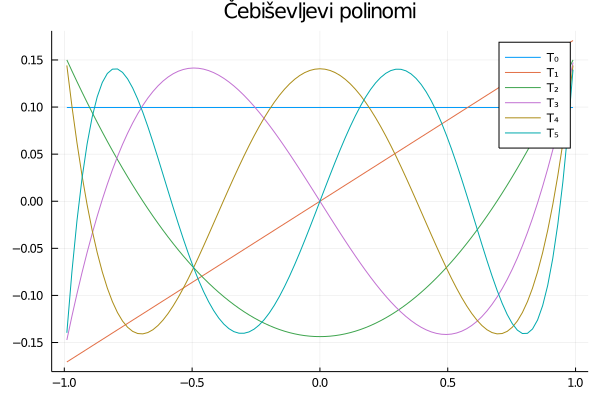

In [19]:
plot(x,Q,title="Čebiševljevi polinomi",label=["T₀" "T₁" "T₂" "T₃" "T₄" "T₅"])

__Zadatak.__ Normirajte stupce matrice $Q$ tako da vektori
poprimaju sve vrijednosti u intervalu $[-1,1]$. 